# Face Recognition in the New Conx

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# functions for loading my cmu_faces .npz dataset files

def load_dataset_npz(filename):
    """loads a normed face dataset file and returns a numpy array of shape
    (num, vector_size) with dtype float32, and an array of label strings
    """
    assert filename.endswith('.npz'), "filename must end in .npz"
    f = np.load(filename)
    images, labels = f['data'], f['labels']
    num_images, height, width = images.shape
    inputs = images.reshape((num_images, height*width))
    return inputs, labels

def create_pose_targets(labels):
    """converts a list of label strings to one-hot pose target vectors"""
    pose_names = ['left', 'forward', 'up', 'right']
    make_target_vector = lambda x: [int(x == name) for name in pose_names]
    poses = [s.split('_')[1] for s in labels]
    return np.array([make_target_vector(p) for p in poses]).astype('uint8')


In [2]:
# set up pose recognizer network

from conx import Network, Layer, SGD

# uncomment one of the following lines:
datafile, rows, cols = 'cmu_faces_full_size.npz', 120, 128
#datafile, rows, cols = 'cmu_faces_half_size.npz', 60, 64
#datafile, rows, cols = 'cmu_faces_quarter_size.npz', 30, 32

inputs, labels = load_dataset_npz(datafile)
targets = create_pose_targets(labels)

# shuffle dataset (should probably happen automatically whenever a dataset is loaded or split)
shuffle = np.random.permutation(len(inputs))
inputs, targets = inputs[shuffle], targets[shuffle]

net = Network("Pose recognizer")
net.add(Layer('input', rows*cols))
net.add(Layer('hidden', 3, activation='sigmoid'))
net.add(Layer('output', 4, activation='sigmoid'))
net.connect()
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.1))

net.dataset.load_direct(inputs, targets)

net.dataset.split(0.40)  # use 40% of the dataset for validation


conx, version 3.3.4
Using Theano backend.


In [3]:
net.dataset.summary()

Input Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : (15360,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : (4,)
   range  : (0, 1)


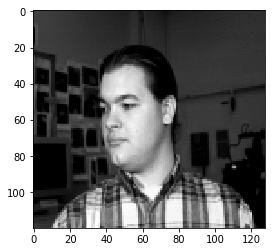

In [4]:
plt.imshow(net.dataset._inputs[0].reshape((rows,cols)), cmap='gray')
plt.show()

In [5]:
net.dataset.targets[0]

[1, 0, 0, 0]

In [6]:
net.train(200, accuracy=1.0, tolerance=0.25, batch_size=1, report_rate=25)

Training...
       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#    0 |   0.19289 |   0.00000 |   0.18802 |   0.00000 
#   25 |   0.06472 |   0.69786 |   0.08687 |   0.56800 
#   50 |   0.02120 |   0.89305 |   0.05190 |   0.77200 
#   75 |   0.01552 |   0.92513 |   0.03539 |   0.84400 
#  100 |   0.01499 |   0.92513 |   0.03482 |   0.85200 
#  125 |   0.01468 |   0.92513 |   0.03454 |   0.86000 
#  150 |   0.01449 |   0.93048 |   0.03422 |   0.86400 
#  175 |   0.01436 |   0.93316 |   0.03534 |   0.88800 
#  200 |   0.01425 |   0.93316 |   0.03524 |   0.88400 


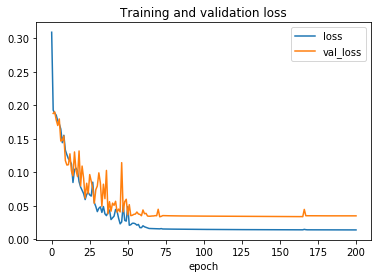

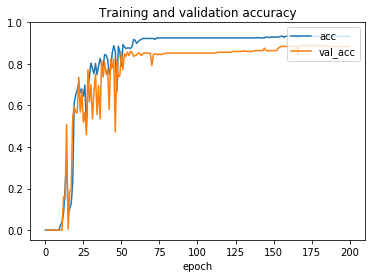

In [7]:
net.plot(['loss', 'val_loss'], title="Training and validation loss")
net.plot(['acc', 'val_acc'], ymax=1, title="Training and validation accuracy")

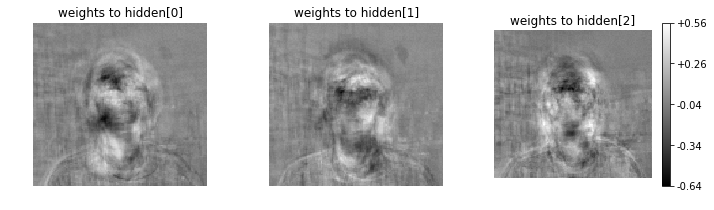

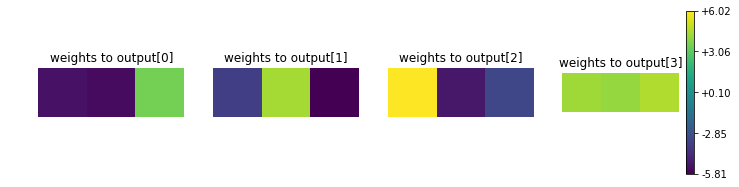

In [8]:
net.plot_layer_weights('hidden', vshape=(rows,cols))
net.plot_layer_weights('output', cmap='viridis')

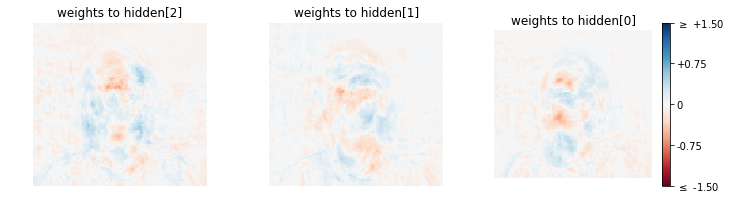

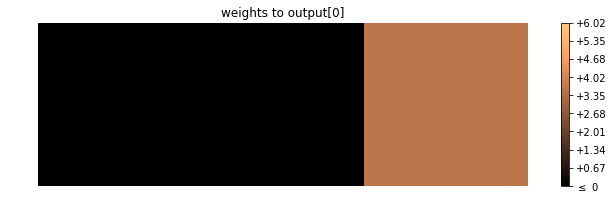

In [9]:
# colorbar colors or values can be easily changed
net.plot_layer_weights('hidden', vshape=(rows,cols), units=(2,1,0), cmap="RdBu", wrange=(-1.5, 1.5))
net.plot_layer_weights('output', units=0, wmin=0, cmap="copper", ticks=10)

In [10]:
net.show_unit_weights('output', 0)

-5.25 -5.45  3.56 
